# K-Means Exercise:  Student Clusters


What is differentiated instruction, and why do you care?

If you are interested in diminishing  inequities in your practice, your department, your college, or your institution, what is the measure of that disparate impact?  What are the methods of intervention you will consider?  What data sources will you look at?  

Observing available data "bootstraps" this process of bringing to light inequities in a practice or in a system.  Participatory  Action Research (PAR) is a framework that helps us think about our students, our practice, and our institution. 

Take a look at the following table of hypothetical student scores in Math and Physics:



| Student | Physics | Math |
| ------- | ------- | ---- |
| P       | 15      | 20   |
| Q       | 20      | 15   |
| R       | 26      | 21   |
| X       | 44      | 52   |
| Y       | 50      | 45   |
| Z       | 57      | 38   |
| A       | 80      | 85   |
| B       | 90      | 88   |
| C       | 98      | 98   |


In [55]:
from sklearn.cluster import KMeans
import numpy as np


#besX = np.array([[15,20],[20,15],[26,21],[44,52],[50,45],[57,38],[80,85],[90,88],[98,98] ])   #this works. Offer as orderd pairs

# Or using 4 lines
physicsScores = np.array([15,20,26,44,50,57,80,90,98])
mathScores    = np.array([20,15,21,52,45,38,85,88,98])
besPairedList = [[x,y] for x,y in zip(physicsScores, mathScores)  ]   #forms ordered pairs
X = np.array(besPairedList)

# COMPUTE K-MEANS Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


kmeans.predict([[0, 0], [12, 3]])  #returns indices of appropriate clusters ?

print(kmeans.cluster_centers_)  # show the centroids (2 centroids, 2 clusters)
print(kmeans.labels_)           # show the class (0 or 1) that each ordered pair belongs in 




[[50.33333333 45.        ]
 [89.33333333 90.33333333]
 [20.33333333 18.66666667]]
[2 2 2 0 0 0 1 1 1]


# Basic Plotting
In order to see  the data points and the centroids, we'll plot both.  For the next run, we want to plot clusters and centroids by color.

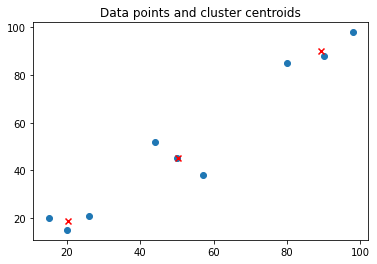

In [58]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

It appears that we have 3 clusters in our graph.  Could this happen in reality? Is this information 
that you want to know about as a counselor, caculty, or school dean?  Is it important enough to you to try do something about the clustering you see?

If you undergo an attempt to diminish the disparities, what questions will you ask?  If you wish to research the efficacy of your interventions, what data will you look at? What pre and post-tests will you perform in your research?  And in this  research" endeavor, who is the subject?  Yourself, the students, the institution?  The [Participatory Action Research](https://en.wikipedia.org/wiki/Participatory_action_research)  framework starts with the idea that there are multiple participants in this research.

# Evaluating the Cluster: silhouette scores

- value b/t 1 and -1
- 1 is best for any single data point
- -1 is worst
- values near zero indicate overlapping clusters
- Can be used to determine an adequate value for k

In [48]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.6793836143378945
